# <font color=Red> Web scraping Projects </font> 
[Automate The Boring Stuff with Python -- Online PDF](https://automatetheboringstuff.com/chapter11/)

Several modules that make it easy to scrape web pages in Python.

* **webbrowser**     : Comes with Python and opens a browser to a specific page.

* **`requests`**       : Downloads files and web pages from the Internet.


* **Beautiful Soup** :  Parses HTML, the format that web pages are written in.

* **Selenium**       : Launches and controls a web browser. **Selenium is able to fill in forms and simulate mouse clicks in this browser.**

## Project_01:  <font color=blue> Open Google Map in Browser with copied address </font>
    
The `webbrowser` module’s `open()` function can launch a new browser to a specified URL

In [1]:
import webbrowser as wb
import sys
import pyperclip

In [2]:
if len(sys.argv) > 1:
    address = ' '.join(sys.argv[1:])
else:
    address = pyperclip.paste()

In [3]:
wb.open('https://www.google.com/maps/place/' + address)

True

## Project_02: <font color=blue> Downloading Files from the Web with the requests Module </font>

The requests module lets you easily download files from the Web without having to worry about complicated issues such as network errors, connection problems, and data compression. The requests module was written because Python’s `urllib2` module is too complicated to use.  

The `requests.get()` function takes a string of a URL to download. By calling `type()` on requests.get( )’s return value, you can see that it returns a Response object, which contains the response that the web server gave for your request.

The URL goes to a text web page for the entire play of Romeo and Juliet. You can tell that the request for this web page succeeded by checking the status_code attribute of the Response object. If it is equal to the value of `requests.codes.ok`, then everything went fine. (Incidentally, the status code for “OK” in the HTTP protocol is 200)

If the request succeeded, the downloaded web page is stored as a string in the Response object’s `text` variable.



In [4]:
import requests as re

In [5]:
response_obj = re.get('https://automatetheboringstuff.com/files/rj.txt')

In [6]:
type(response_obj)

requests.models.Response

In [7]:
response_obj.status_code

200

In [8]:
response_obj.status_code == re.codes.ok  ## True means the status_code is 200

True

A simpler way to check for success is to call the `raise_for_status()` method on the Response object. This will raise an exception if there was an error downloading the file and will do nothing if the download succeeded.

In [9]:
response_obj.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [10]:
res = re.get('http://inventwithpython.com/page_that_does_not_exist')
try:
    res.raise_for_status()
except Exception as exc:
    print('There was a problem: %s' % (exc))

There was a problem: 404 Client Error: Not Found for url: http://inventwithpython.com/page_that_does_not_exist


In [12]:
print(response_obj.text[:250])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Projec


You must open the file in write **binary mode** by passing the string 'wb' as the second argument to open(). Even if the page is in plaintext (such as the Romeo and Juliet text you downloaded earlier), you need to write binary data instead of text data in order to maintain the Unicode encoding of the text.

In [13]:
playFile = open('RomeoAndJuliet.txt', 'wb')
for chunk in response_obj.iter_content(100000):
    playFile.write(chunk)

## Project_03: <font color=blue> Parsing HTML with Beautiful Soup </font>

Some elements in HTML have an `id` attribute that is used to uniquely identify the element in the page. You will often instruct your programs to seek out an element by its id attribute, so figuring out an element’s id attribute using the browser’s `developer tools` is a common task in writing web scraping programs.

After enabling or installing the developer tools in your browser, you can right-click any part of the web page and select `Inspect Element` from the context menu to bring up the HTML responsible for that part of the page. This will be helpful when you begin to parse HTML for your web scraping programs.

**Don’t Use Regular Expressions to Parse HTML.**

Locating a specific piece of HTML in a string seems like a perfect case for regular expressions. However, I advise you against it. There are many different ways that HTML can be formatted and still be considered valid HTML, but trying to capture all these possible variations in a regular expression can be tedious and error prone. A module developed specifically for parsing HTML, such as `Beautiful Soup`, will be less likely to result in bugs.

In [51]:
# The bs4.BeautifulSoup() function needs to be called with a string containing the HTML it will parse. 
# The bs4.BeautifulSoup() function returns is a BeautifulSoup object.
import requests as re,bs4

In [52]:
# Step 01: Creating a BeautifulSoup Object from HTML
res = re.get('https://nostarch.com/automatestuff/')
try:
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text)
    print(type(soup))
except Exception as exc:
    print('There was a problem: %s' % (exc))

<class 'bs4.BeautifulSoup'>


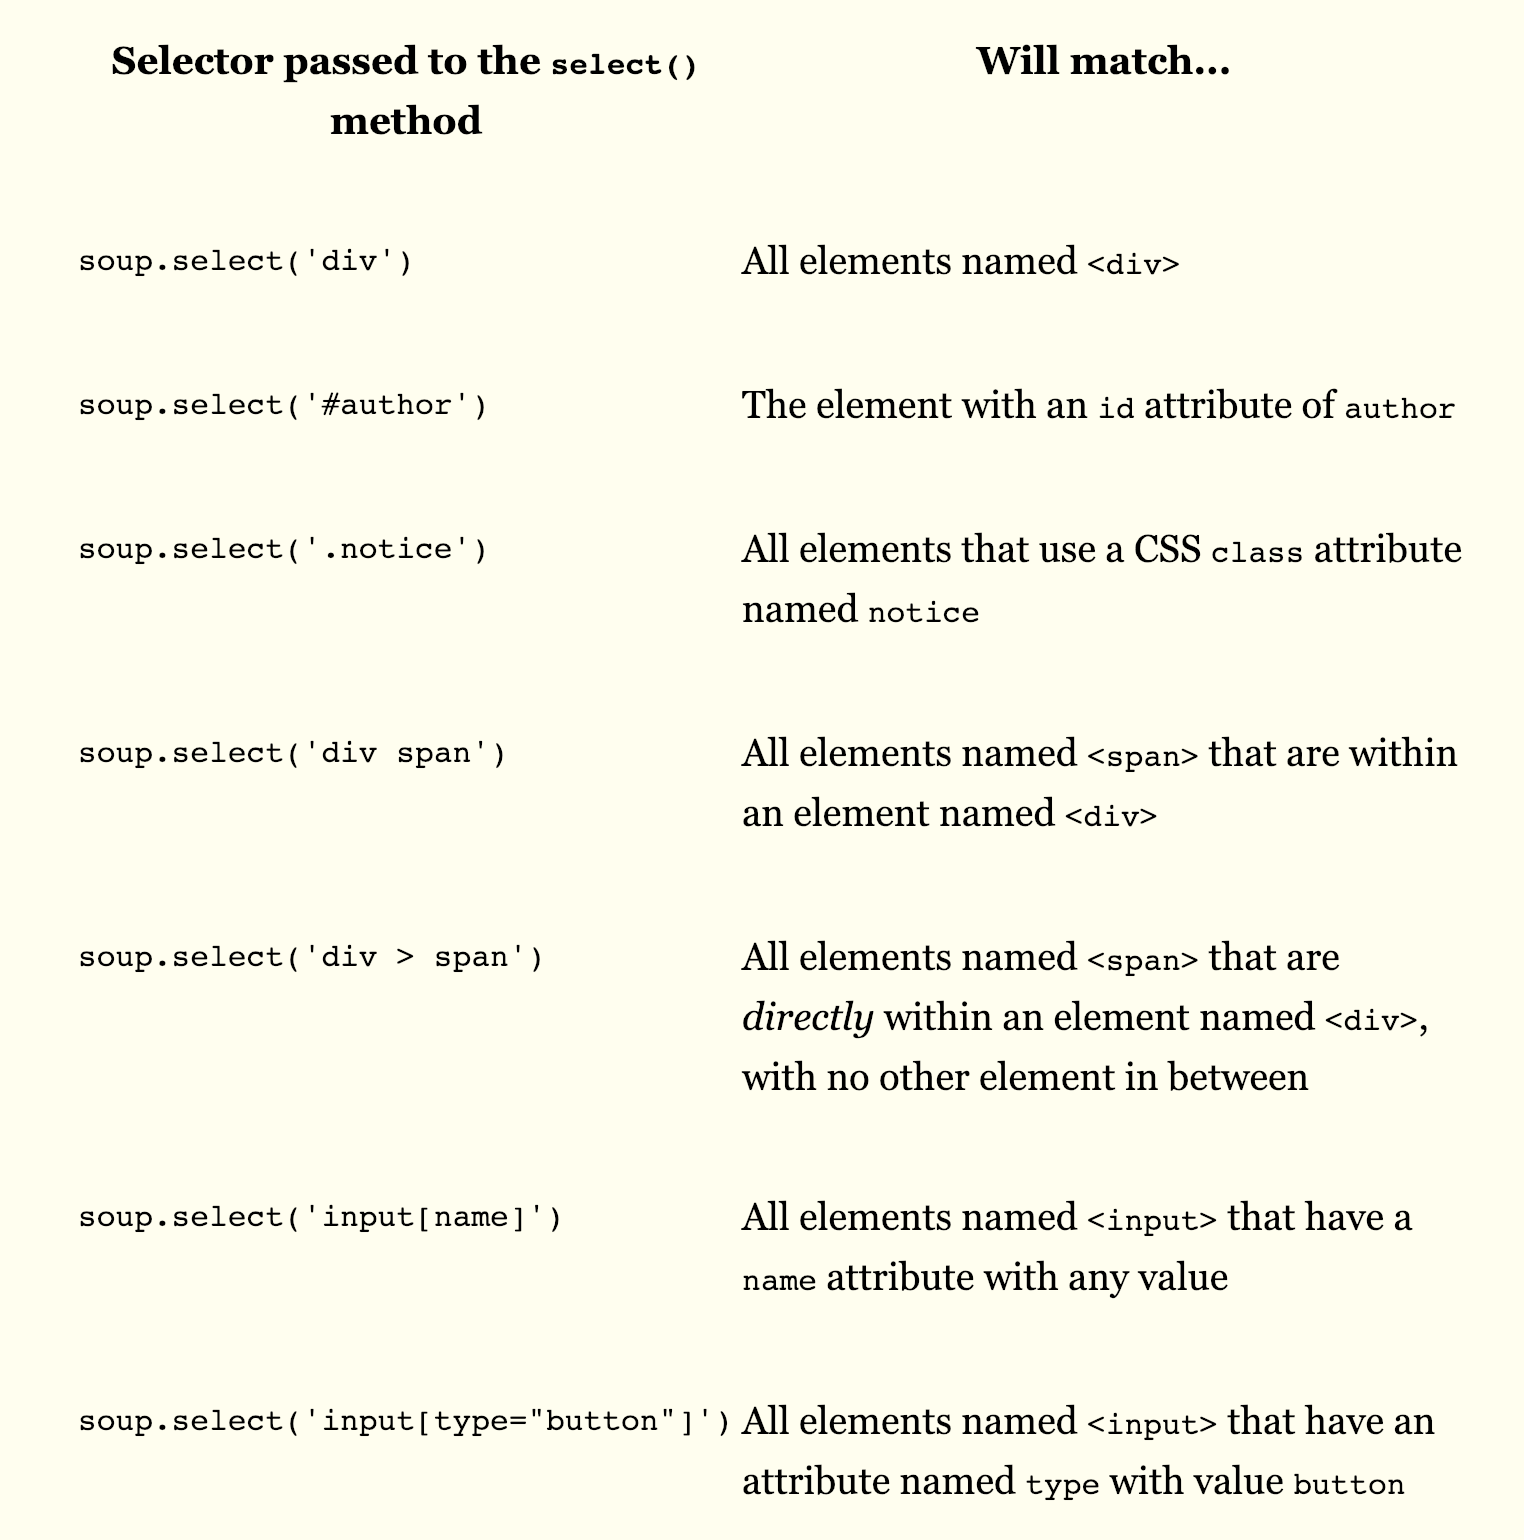

In [53]:
# Step 02: Finding an Element with the select() Method

from IPython.display import Image
Image(filename='images/01.png',width=500)

The select ( ) method will return a list of Tag objects, which is how Beautiful Soup represents an HTML element. The list will contain one Tag object for every match in the BeautifulSoup object’s HTML. Tag values can be passed to the str( ) function to show the HTML tags they represent. Tag values also have an attrs attribute that shows all the HTML attributes of the tag as a dictionary.

In [92]:
elems = soup.select('div .field-items')

print(len(elems))

for i in elems:
    if "by Al Sweigart" in str(i.getText()):
        print("             -----         ")
        print()
        print(i.getText())
        print(i.attrs)
        print()

12
             -----         

by Al Sweigart
{'class': ['field-items']}



## Project_04: <font color=blue> Count the number of broken links in a webpage </font>

## Project_05: <font color=blue> Google Search with Keyword </font>

## Project_06: <font color=blue> Download all images from XKCD comic website </font>